<a href="https://colab.research.google.com/github/sanganakcode/MLProject/blob/main/BankMarketing_1009.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd

In [ ]:
#Download data from
#https://www.kaggle.com/code/vinicius150987/bank-full-machine-learning/input?select=bank-full.csv

In [14]:
# Load the dataset
dataset = pd.read_csv("/bank-full.csv", sep=';')  # Assuming the file is delimited by semi-colons based on its format

# Display the first few rows of the dataset
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [15]:
# Check the shape of the dataset
num_records, num_features = dataset.shape
num_records, num_features

(45211, 17)

In [16]:
sample=dataset.sample(n = 4789)

In [6]:
sample.shape

(4789, 17)

In [13]:
#dataset = dataset.append(sample, ignore_index=True)

<ipython-input-13-6d7f183276db>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(sample, ignore_index=True)


In [9]:
dataset.shape


(50000, 17)

In [ ]:
# Calculate the percentage of missing values for each column
missing_percentage = (dataset.isnull().sum() / num_records) * 100
missing_percentage

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64

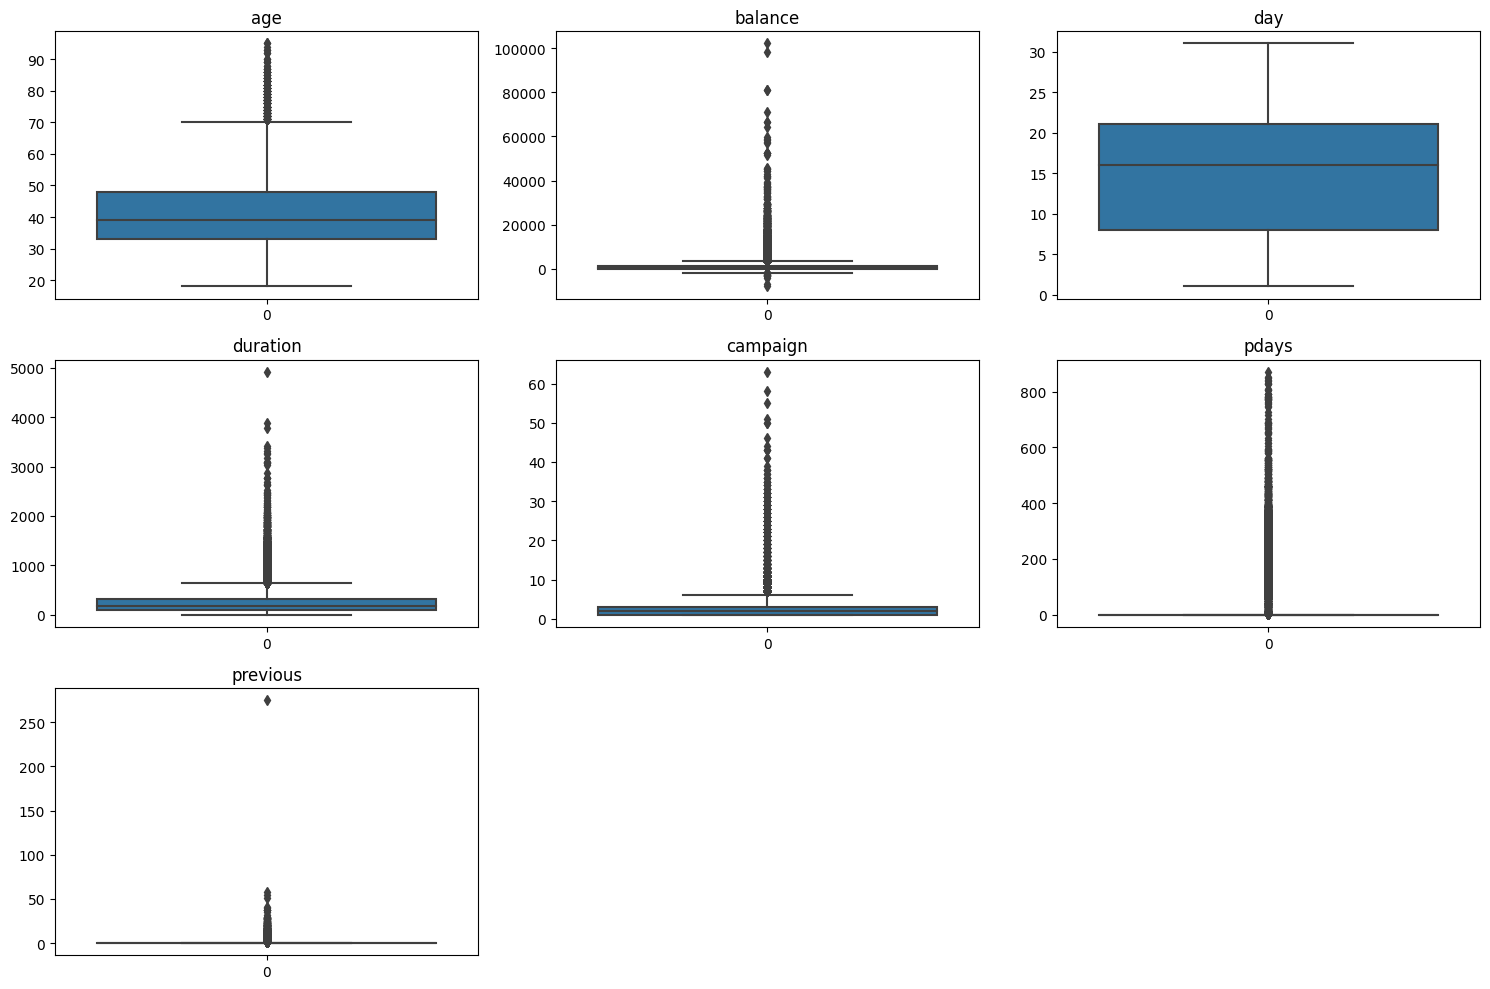

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter numeric columns for visualization
numeric_columns = dataset.select_dtypes(include=['int64', 'float64']).columns

# Plot boxplots for each numeric column to identify outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(dataset[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

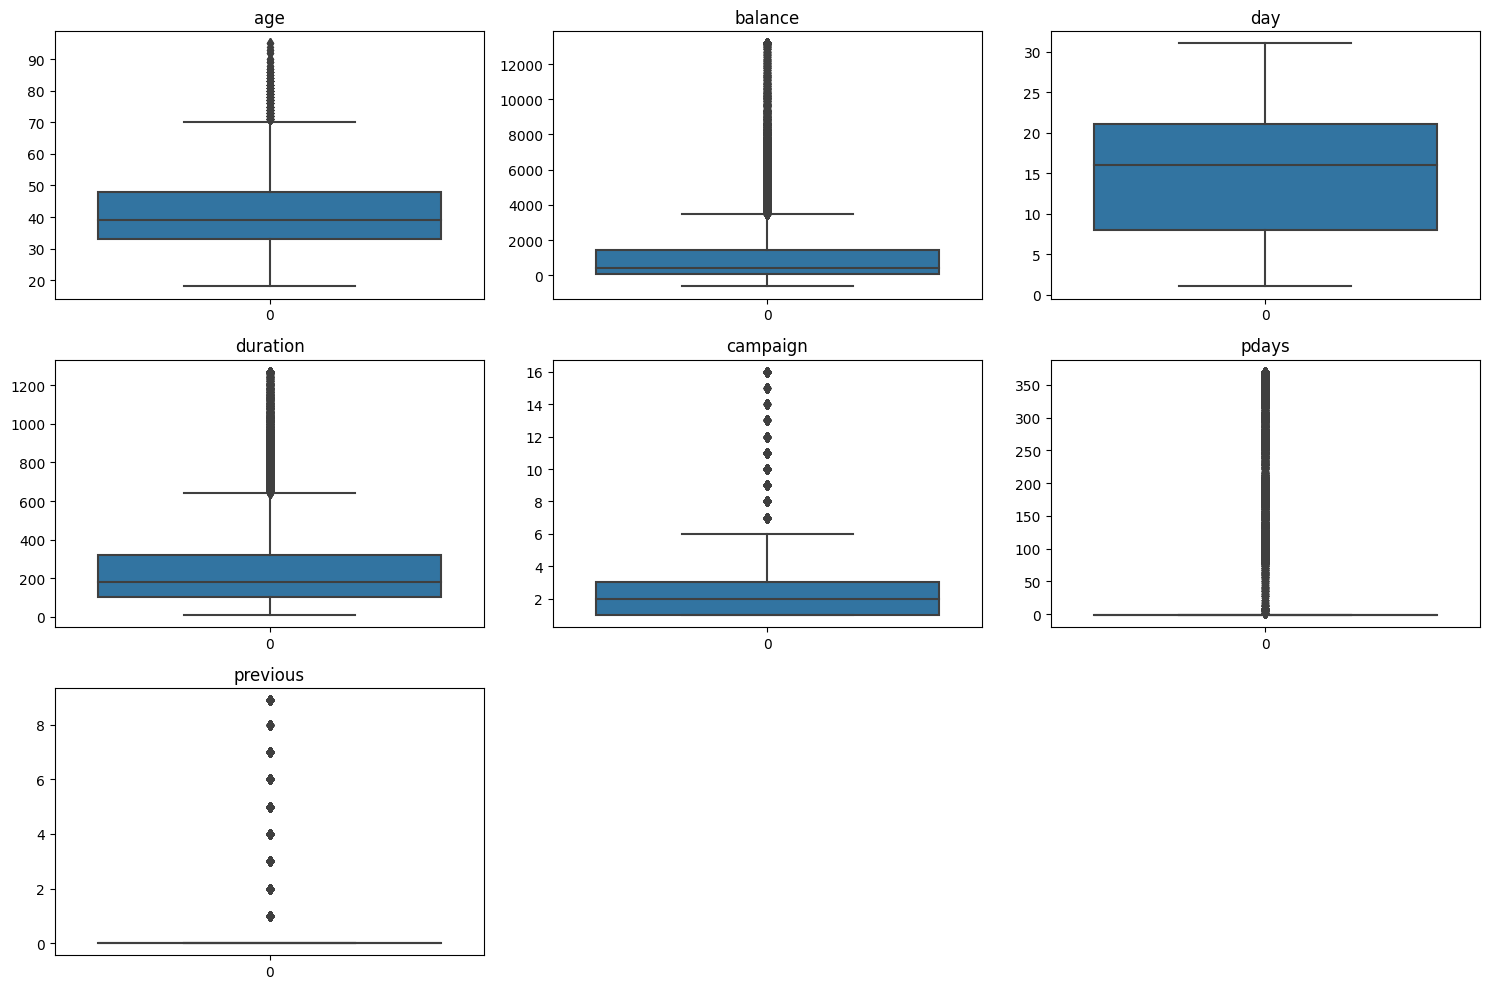

In [ ]:
# Cap outliers based on the 1st and 99th percentiles
for col in ['balance', 'duration', 'campaign', 'pdays', 'previous']:
    lower = dataset[col].quantile(0.01)
    upper = dataset[col].quantile(0.99)
    dataset[col] = dataset[col].clip(lower, upper)

# Plot the boxplots again to verify the changes
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(dataset[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

In [ ]:
# Check the distribution of the target variable 'y'
target_distribution = dataset['y'].value_counts(normalize=True) * 100
target_distribution

no     88.30152
yes    11.69848
Name: y, dtype: float64

In [ ]:
data=dataset

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Create label encoders for binary categorical variables
binary_columns = ['default', 'housing', 'loan', 'y']
label_encoders = {col: LabelEncoder() for col in binary_columns}

# Apply label encoding to binary columns
for col, encoder in label_encoders.items():
    data[col] = encoder.fit_transform(data[col])

# Apply one-hot encoding to multi-category variables and drop the original columns
data = pd.get_dummies(data, columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome'], drop_first=True)

# Display the transformed data
data.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143.0,1,0,5,261,1,-1,0.0,...,0,0,0,1,0,0,0,0,0,1
1,44,0,29.0,1,0,5,151,1,-1,0.0,...,0,0,0,1,0,0,0,0,0,1
2,33,0,2.0,1,1,5,76,1,-1,0.0,...,0,0,0,1,0,0,0,0,0,1
3,47,0,1506.0,1,0,5,92,1,-1,0.0,...,0,0,0,1,0,0,0,0,0,1
4,33,0,1.0,0,0,5,198,1,-1,0.0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = data.drop('y', axis=1)
y = data['y']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((36168, 42), (9043, 42), (36168,), (9043,))

In [ ]:
n_features = X_train.shape[1]
n_features

42

In [ ]:
y_train

3344     0
17965    0
18299    0
10221    0
32192    1
        ..
11284    1
44732    0
38158    0
860      0
15795    0
Name: y, Length: 36168, dtype: int64

In [ ]:
print("Before OverSampling count of yes: {}".format(sum(y_train==1)))
print("Before OverSampling count of no: {} \n".format(sum(y_train==0)))

Before OverSampling count of yes: 4198
Before OverSampling count of no: 31970 



In [ ]:
import smote_variants as sv
import numpy as np

In [ ]:
# Oversampling
!pip install smote-variants

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.4/407.4 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 6.5 MB/s eta 0:00:00
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10588 sha256=b9efb2769f35241b8082e3e850a95f319aaa032341e9274a8070ca5dd4281aef
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
  Created wheel for statistics: filename=statistics-1.0.3.5-py3-none-any.whl size=7436 sha256=29d97520528c9cba77917ac263daf24a95ac95afb9b903139e81a88397e156b3
  Stored in directory: /root/.cache/pip/wheels/59/bd/aa/41ad56fbb723d36e457b5be74feb992cdac2855a6999ba34a1
Successfully built minisom statistics


In [ ]:
# Instantiating the SMOTE class
oversampler= sv.SMOTE()

In [ ]:
# Creating new training set
X_train_os, y_train_os = oversampler.sample(np.array(X_train), np.array(y_train))

2023-10-06 13:35:19,041:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'nn_params': {}, 'n_jobs': 1, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'SMOTE'}")
INFO:smote_variants:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'nn_params': {}, 'n_jobs': 1, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'SMOTE'}")
2023-10-06 13:35:19,053:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
INFO:smote_variants:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2023-10-06 13:35:19,059:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
INFO:smote_variants:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2023-10-06 13:35:19,255:INFO:SMOTE: simplex sampl

In [ ]:
# Shape after oversampling
print('After OverSampling, the shape of train_X: {}'.format(X_train_os.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_os.shape))
print("After OverSampling, counts of label 'Yes': {}".format(sum(y_train_os==1)))
print("After OverSampling, counts of label 'no': {}".format(sum(y_train_os==0)))

After OverSampling, the shape of train_X: (63940, 42)
After OverSampling, the shape of train_y: (63940,) 

After OverSampling, counts of label 'Yes': 31970
After OverSampling, counts of label 'no': 31970


In [ ]:
# mlp for binary classification
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Step 1: define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# train the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=1)

Epoch 1/150
1131/1131 [==============================] - 5s 2ms/step - loss: 0.2842 - accuracy: 0.8870
Epoch 2/150
1131/1131 [==============================] - 2s 2ms/step - loss: 0.2236 - accuracy: 0.9006
Epoch 3/150
1131/1131 [==============================] - 2s 2ms/step - loss: 0.2164 - accuracy: 0.9019
Epoch 4/150
1131/1131 [==============================] - 2s 2ms/step - loss: 0.2128 - accuracy: 0.9038
Epoch 5/150
1131/1131 [==============================] - 3s 2ms/step - loss: 0.2106 - accuracy: 0.9036
Epoch 6/150
1131/1131 [==============================] - 2s 2ms/step - loss: 0.2083 - accuracy: 0.9047
Epoch 7/150
1131/1131 [==============================] - 2s 2ms/step - loss: 0.2065 - accuracy: 0.9060
Epoch 8/150
1131/1131 [==============================] - 2s 2ms/step - loss: 0.2049 - accuracy: 0.9065
Epoch 9/150
1131/1131 [==============================] - 2s 2ms/step - loss: 0.2038 - accuracy: 0.9070
Epoch 10/150
1131/1131 [==============================] - 2s 2ms/step - l

In [ ]:
# train the model with oversampling
model.fit(X_train_os, y_train_os, epochs=150, batch_size=32, verbose=1)

Epoch 1/150
1999/1999 [==============================] - 6s 2ms/step - loss: 0.4193 - accuracy: 0.8091
Epoch 2/150
1999/1999 [==============================] - 4s 2ms/step - loss: 0.3227 - accuracy: 0.8659
Epoch 3/150
1999/1999 [==============================] - 4s 2ms/step - loss: 0.3064 - accuracy: 0.8743
Epoch 4/150
1999/1999 [==============================] - 4s 2ms/step - loss: 0.2979 - accuracy: 0.8788
Epoch 5/150
1999/1999 [==============================] - 5s 2ms/step - loss: 0.2924 - accuracy: 0.8815
Epoch 6/150
1999/1999 [==============================] - 4s 2ms/step - loss: 0.2878 - accuracy: 0.8836
Epoch 7/150
1999/1999 [==============================] - 4s 2ms/step - loss: 0.2849 - accuracy: 0.8852
Epoch 8/150
1999/1999 [==============================] - 5s 2ms/step - loss: 0.2822 - accuracy: 0.8866
Epoch 9/150
1999/1999 [==============================] - 4s 2ms/step - loss: 0.2798 - accuracy: 0.8872
Epoch 10/150
1999/1999 [==============================] - 4s 2ms/step - l

In [ ]:
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

283/283 [==============================] - 0s 1ms/step


In [ ]:
import tensorflow as tf

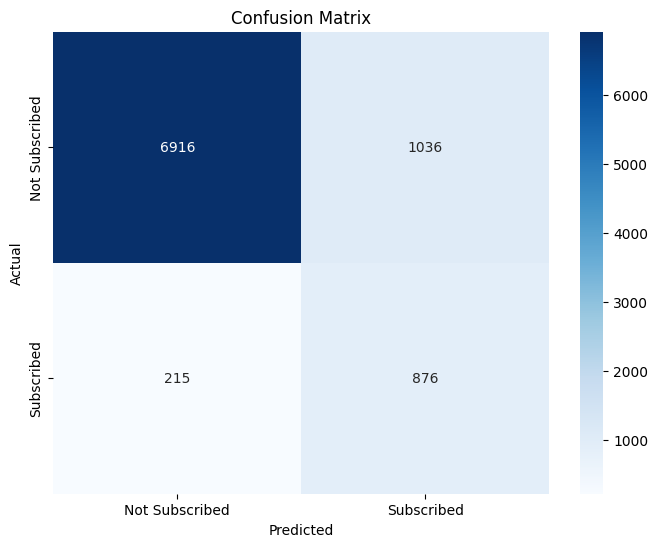

In [ ]:

# Compute the confusion matrix using TensorFlow
conf_matrix = tf.math.confusion_matrix(y_test, y_pred).numpy()

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Not Subscribed', 'Subscribed'],
            yticklabels=['Not Subscribed', 'Subscribed'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 3.8 MB/s eta 0:00:00


In [ ]:
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [ ]:
from sklearn.inspection import permutation_importance
# Evaluate the model performance on the testing set
test_loss, test_acc = model.evaluate(X_test, y_test)

# Calculate the baseline performance
baseline = test_acc

# Calculate the feature importance scores
results = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
importance = results.importances_mean

# Print the feature importance scores
for i,v in enumerate(importance):
    print('Feature %d: %.5f' % (i,v))

# Plot the feature importance chart
plt.bar([x for x in range(len(importance))], importance)
plt.show()

283/283 [==============================] - 1s 2ms/step - loss: 0.3203 - accuracy: 0.8617


TypeError: ignored

In [ ]:

# expected_value_scalar = float(explainer.expected_value[0])

# # Visualize the SHAP values for a specific instance (e.g., the first instance in the test set)
# shap.initjs()
shap.force_plot(expected_value_scalar, shap_values_array[0], X_test[0, :])

In [ ]:
explainer = shap.DeepExplainer(model, X_train_os[:100])  # Using a subset for efficiency
# Convert tensors to numpy arrays for visualization
expected_value_array = np.array(explainer.expected_value[0])
shap_values_array = np.array(shap_values[0])

# Visualize the SHAP values for a specific instance (e.g., the first instance in the test set)
shap.initjs()
shap.force_plot(expected_value_array, shap_values_array[0], X_test[0])

TypeError: ignored

In [ ]:
# Use Deep SHAP to explain the model's predictions
explainer = shap.DeepExplainer(model, X_train_os[:100])  # Using a subset for efficiency
shap_values = explainer.shap_values(X_test)


[array([[ 1.06569270e-04,  1.66508939e-05,  8.94593248e-03, ...,
         -3.36734104e-03,  1.49590553e-03, -2.16619088e-02],
        [-7.52079837e-04,  3.68819865e-06, -1.39250437e-03, ...,
         -2.19864183e-03,  2.31476384e-03, -1.18486179e-02],
        [ 1.40502169e-02,  1.33396710e-04,  1.16393281e-02, ...,
         -2.27337302e-03, -5.22063941e-03, -2.09841607e-02],
        ...,
        [ 2.94031610e-04,  1.55115247e-04,  1.37020624e-02, ...,
         -2.82585155e-03,  4.51026792e-03, -2.82274881e-02],
        [ 7.44259623e-05,  1.40067758e-05,  6.91075432e-03, ...,
         -2.07590640e-03,  1.93789505e-03, -1.64533764e-02],
        [ 3.82706608e-03,  7.23424777e-05,  4.97723222e-03, ...,
         -4.36873024e-03,  7.16150300e-03, -1.86687600e-02]])]

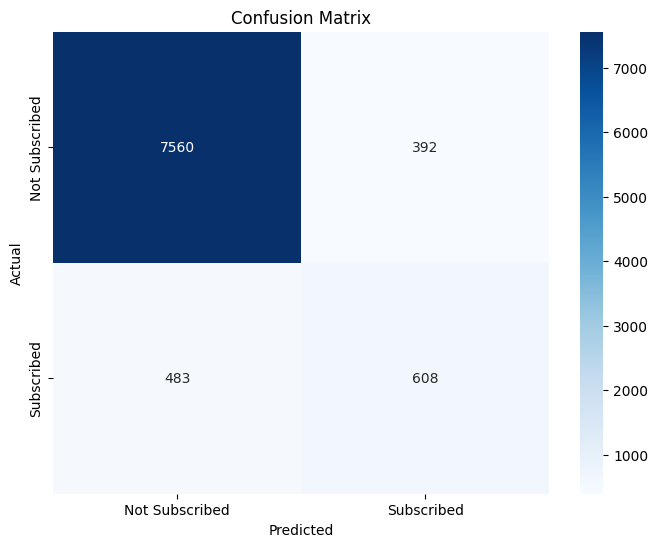

In [ ]:
# Compute the confusion matrix using TensorFlow
conf_matrix = tf.math.confusion_matrix(y_test, y_pred).numpy()

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Not Subscribed', 'Subscribed'],
            yticklabels=['Not Subscribed', 'Subscribed'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()